<a href="https://colab.research.google.com/github/ZainGeeky/Predicting-Heart-Disease-through-Machine-Learning-/blob/main/Day_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split     

In [2]:
df = pd.read_csv('https://talentcocomedia.s3.amazonaws.com/ml-assets/heart-disease.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
y = df['target']

In [5]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [6]:
x = df.drop('target',axis=1)

In [7]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)     

In [9]:
print(x_train.shape)

(212, 13)


In [10]:
print(y_train.shape)

(212,)


In [11]:
print(x_test.shape)

(91, 13)


In [12]:
print(y_test.shape)     

(91,)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(penalty='l2')

val = list(np.arange(1, 100, 1))

parameters = {'solver':('newton-cg', 'liblinear', 'sag', 'saga'), 'C':val}

clf_lr = GridSearchCV(lr_model, parameters)
clf_lr.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                               27, 28, 29, 30, ...],
                         'solver': ('newton-cg', 'liblinear', 'sag', 'saga')})

In [14]:
print(clf_lr.best_params_)

{'C': 4, 'solver': 'liblinear'}


In [15]:
test_pred = clf_lr.predict(x_test)

In [16]:
acc_lr_gs = accuracy_score(test_pred,y_test)
acc_lr_gs

0.8021978021978022

In [17]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()

val = list(np.arange(1,10, 1))

parameters = {'n_neighbors':val}

clf_knn = GridSearchCV(neigh, parameters)
clf_knn.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [18]:
print(clf_knn.best_params_)

{'n_neighbors': 7}


In [19]:
test_pred_knn = clf_knn.predict(x_test)

In [20]:
accuracy_knn_gs = accuracy_score(test_pred_knn, y_test)
accuracy_knn_gs  

0.6153846153846154

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [22]:
clf = DecisionTreeClassifier(random_state=1024)

param_grid = {
              'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : np.arange(1,10,1),
              'criterion' :['gini', 'entropy']
             }

clf_dtc = GridSearchCV(clf, param_grid=param_grid, cv=5, verbose=True)

clf_dtc.fit(x_train, y_train)
     

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [23]:
print(clf_dtc.best_params_)     

{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto'}


In [24]:
test_pred_dtc = clf_dtc.predict(x_test)

In [25]:
accuracy_dtc_gs = metrics.accuracy_score(y_test, test_pred_dtc)
accuracy_dtc_gs

0.7692307692307693

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_pred,y_test)     

array([[37,  9],
       [ 9, 36]])

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_pred)) 

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        46
           1       0.80      0.80      0.80        45

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



In [28]:
confusion_matrix(test_pred_knn,y_test)

array([[24, 13],
       [22, 32]])

In [29]:
print(classification_report(y_test,test_pred_knn))

              precision    recall  f1-score   support

           0       0.65      0.52      0.58        46
           1       0.59      0.71      0.65        45

    accuracy                           0.62        91
   macro avg       0.62      0.62      0.61        91
weighted avg       0.62      0.62      0.61        91



In [30]:
confusion_matrix(test_pred_dtc,y_test)    

array([[32,  7],
       [14, 38]])

In [31]:
print(classification_report(y_test,test_pred_dtc))

              precision    recall  f1-score   support

           0       0.82      0.70      0.75        46
           1       0.73      0.84      0.78        45

    accuracy                           0.77        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.78      0.77      0.77        91



In [32]:
prob_lr = clf_lr.predict_proba(x_test)
prob_knn = clf_knn.predict_proba(x_test)
prob_dtc = clf_dtc.predict_proba(x_test)

In [33]:
#keeping only the 2nd column (positive values) and discarding the 1st column (negative values)
prob_lr =  prob_lr[:, 1]
prob_knn = prob_knn[:, 1]
prob_dtc = prob_dtc[:, 1]

In [34]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, prob_lr)
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, prob_knn)
fpr_dtc, tpr_dtc, thresh_dtc = roc_curve(y_test, prob_dtc)

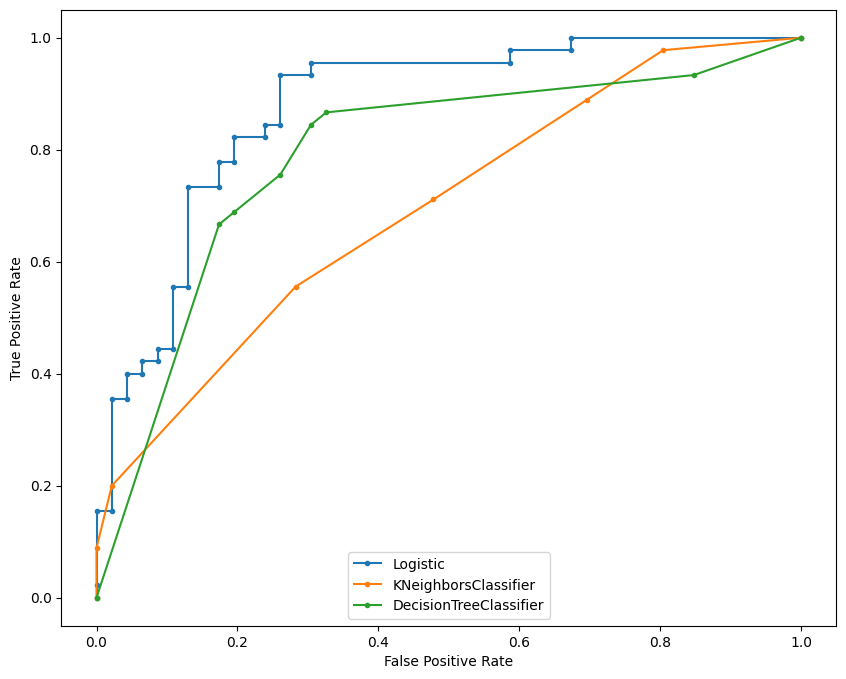

In [35]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(fpr_lr, tpr_lr, marker='.', label='Logistic')
ax.plot(fpr_knn, tpr_knn, marker='.', label='KNeighborsClassifier')
ax.plot(fpr_dtc, tpr_dtc, marker='.', label='DecisionTreeClassifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=8)

plt.show()

In [36]:
from sklearn.metrics import roc_auc_score

auc_lr = roc_auc_score(y_test, prob_lr)
auc_knn = roc_auc_score(y_test, prob_knn)
auc_dtc = roc_auc_score(y_test, prob_dtc)

print(f'Logistic : ROC AUC = {round(auc_lr, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_knn, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_dtc, 3)*100} %')
     

Logistic : ROC AUC = 87.5 %
Logistic : ROC AUC = 69.39999999999999 %
Logistic : ROC AUC = 79.0 %


In [37]:
from pandas.core.window.expanding import ExpandingGroupby
from matplotlib.projections.polar import ThetaAxis
n = int(input("Enter no of Patients who's Status is to be Determined :- "))

def Prediction() :
  age = int(input("Age of the Patient (any):- "))
  sex = int(input("Sex of the Patient (0 - female & 1 - male) :- "))
  cp = int(input("Chest Pain Type cp(1/2/3):- "))
  trestbps = int(input("Resting Blood Pressure tresbp(120-140):- "))
  chol = int(input("Serum Cholestrol chol(200-240):- "))
  fbs = int(input("Fasting Blood Sugar fbs(90-130):- "))
  restecg = int(input("Resting ElectroCardiographic Result restecg(60-100):- "))
  thalach = int(input("Maximum Heart Rate Achieved thalach(40-170):- "))
  exang = int(input("Exercise-include angina (1 - True, 0 - False) :- "))
  oldpeak = float(input("ST Depression induced by Exercise relative to Rest oldpeak(0-5):- "))
  slope = int(input("Slope of Peak Exercise ST segment slope(0-2):- "))
  ca = int(input("No. of Major Vessels (0-3) :- "))
  thal = int(input("Thalasemia Indicator thal(0/1) :- "))
  new_patient = np.array([age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal])

  new_patient = new_patient.reshape(1,-1) #converting to 2D array

  if clf_lr.predict(new_patient) == 0 :
    return "The Patient with the provided details may DIE"
  else :
    return "The Patient with the provided details may LIVE"

for i in range(n) :
  print(Prediction())
     

Enter no of Patients who's Status is to be Determined :- 1
Age of the Patient (any):- 25
Sex of the Patient (0 - female & 1 - male) :- 1
Chest Pain Type cp(1/2/3):- 2
Resting Blood Pressure tresbp(120-140):- 120
Serum Cholestrol chol(200-240):- 220
Fasting Blood Sugar fbs(90-130):- 100
Resting ElectroCardiographic Result restecg(60-100):- 70
Maximum Heart Rate Achieved thalach(40-170):- 80
Exercise-include angina (1 - True, 0 - False) :- 1
ST Depression induced by Exercise relative to Rest oldpeak(0-5):- 5
Slope of Peak Exercise ST segment slope(0-2):- 2
No. of Major Vessels (0-3) :- 3
Thalasemia Indicator thal(0/1) :- 0
The Patient with the provided details may LIVE


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
